In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)

In [2]:
import talib
def get_all_indicators(dataframe):
    candles_indicators = dataframe.copy()    
    candles_indicators["rsi"] = talib.RSI(candles_indicators["close"], timeperiod=14)
    candles_indicators["ema_12"] = talib.EMA(candles_indicators["close"], timeperiod=12)
    candles_indicators["ema_26"] = talib.EMA(candles_indicators["close"], timeperiod=26) 

    upper_band, middle_band, lower_band = talib.BBANDS(candles_indicators["close"], timeperiod=20, 
                                                nbdevup=2, nbdevdn=2, matype=0)

    candles_indicators["upper_bband"] = upper_band
    candles_indicators["middle_bband"] = middle_band
    candles_indicators["lower_bband"] = lower_band


    macd, macd_signal, macd_hist = talib.MACD(candles_indicators["close"], fastperiod=12, slowperiod=26, 
                                        signalperiod=9)

    candles_indicators["macd"] = macd 
    candles_indicators["macd_signal"] = macd_signal 
    candles_indicators["macd_hist"] = macd_hist
    
    candles_indicators.dropna(inplace=True)
        
    return candles_indicators

In [3]:
def make_feature_engineering(df):
    
    df['percentage_price_change'] = ((df['close'] - df['close'].shift(1))/df['close'].shift(1))*100
    
    #Date
    df["date"] = pd.to_datetime(df["date"])
    df["hour"] = df["date"].dt.hour
    df["day"] = df["date"].dt.day
    df["day_of_week"] = df["date"].dt.weekday
    df["week"] = df["date"].dt.week
    df["month"] = df["date"].dt.month
    df["quarter"] = df["date"].dt.quarter
    df["year"] = df["date"].dt.year
    
    
    #RSI
    df['discrete_rsi'] = 0
    df.loc[df.rsi >= 70, 'discrete_rsi'] = 1
    df.loc[df.rsi <= 30, 'discrete_rsi'] = -1
    
    #EMA
    df['discrete_ema12_ema26'] = -1
    df.loc[df.ema_12 > df.ema_26, 'discrete_ema12_ema26'] = 1
    
    df['discrete_ema_12'] = 0
    df.loc[df.close > df.ema_12, 'discrete_ema_12'] = 1
    df.loc[df.close < df.ema_12, 'discrete_ema_12'] = -1

    df['discrete_ema_26'] = 0
    df.loc[df.close > df.ema_26, 'discrete_ema_26'] = 1
    df.loc[df.close < df.ema_26, 'discrete_ema_26'] = -1
    
    #Bolinger bands
    df['discrete_bollinger_bands'] = 0
    df.loc[df.close > df.upper_bband, 'discrete_bollinger_bands'] = 1
    df.loc[df.close < df.lower_bband, 'discrete_bollinger_bands'] = -1
    
    #MACD
    df['discrete_macd_signal'] = 0
    df.loc[df.macd_signal > 0, 'discrete_macd_signal'] = 1

    df['discrete_macd_hist'] = 0
    df.loc[df.macd_hist > 0, 'discrete_macd_hist'] = 1

    df['discrete_macd_hist_signal'] = 0
    df.loc[df.macd_hist > df.macd_signal, 'discrete_macd_hist_signal'] = 1
        
    df['percentage_price_change_shifted_1'] = df.percentage_price_change.shift(1)
    df['percentage_price_change_shifted_2'] = df.percentage_price_change.shift(2)
    df['percentage_price_change_shifted_3'] = df.percentage_price_change.shift(3)
    df['percentage_price_change_shifted_4'] = df.percentage_price_change.shift(4)
    df['percentage_price_change_shifted_5'] = df.percentage_price_change.shift(5)
    
    df['discrete_rsi_shifted_1'] = df.discrete_rsi.shift(1)
    df['discrete_rsi_shifted_2'] = df.discrete_rsi.shift(2)
    df['discrete_rsi_shifted_3'] = df.discrete_rsi.shift(3)
    df['discrete_rsi_shifted_4'] = df.discrete_rsi.shift(4)
    df['discrete_rsi_shifted_5'] = df.discrete_rsi.shift(5)

    df['discrete_ema12_ema26_Shifted_1'] = df.discrete_ema12_ema26.shift(1)
    df['discrete_ema12_ema26_Shifted_2'] = df.discrete_ema12_ema26.shift(2)
    df['discrete_ema12_ema26_Shifted_3'] = df.discrete_ema12_ema26.shift(3)
    df['discrete_ema12_ema26_Shifted_4'] = df.discrete_ema12_ema26.shift(4)
    df['discrete_ema12_ema26_Shifted_5'] = df.discrete_ema12_ema26.shift(5)
    
    df['discrete_ema_12_shifted_1'] = df.discrete_ema_12.shift(1)
    df['discrete_ema_12_shifted_2'] = df.discrete_ema_12.shift(2)
    df['discrete_ema_12_shifted_3'] = df.discrete_ema_12.shift(3)
    df['discrete_ema_12_shifted_4'] = df.discrete_ema_12.shift(4)
    df['discrete_ema_12_shifted_5'] = df.discrete_ema_12.shift(5)
    
    df['discrete_ema_26_shifted_1'] = df.discrete_ema_26.shift(1)
    df['discrete_ema_26_shifted_2'] = df.discrete_ema_26.shift(2)
    df['discrete_ema_26_shifted_3'] = df.discrete_ema_26.shift(3)
    df['discrete_ema_26_shifted_4'] = df.discrete_ema_26.shift(4)
    df['discrete_ema_26_shifted_5'] = df.discrete_ema_26.shift(5)
    
    df['discrete_macd_signal_shifted_1'] = df.discrete_macd_signal.shift(1)
    df['discrete_macd_signal_shifted_2'] = df.discrete_macd_signal.shift(2)
    df['discrete_macd_signal_shifted_3'] = df.discrete_macd_signal.shift(3)
    df['discrete_macd_signal_shifted_4'] = df.discrete_macd_signal.shift(4)
    df['discrete_macd_signal_shifted_5'] = df.discrete_macd_signal.shift(5)

    df['discrete_macd_hist_shifted_1'] = df.discrete_macd_hist.shift(1)
    df['discrete_macd_hist_shifted_2'] = df.discrete_macd_hist.shift(2)
    df['discrete_macd_hist_shifted_3'] = df.discrete_macd_hist.shift(3)
    df['discrete_macd_hist_shifted_4'] = df.discrete_macd_hist.shift(4)
    df['discrete_macd_hist_shifted_5'] = df.discrete_macd_hist.shift(5)
    
    df['discrete_macd_hist_signal_shifted_1'] = df.discrete_macd_hist_signal.shift(1)
    df['discrete_macd_hist_signal_shifted_2'] = df.discrete_macd_hist_signal.shift(2)
    df['discrete_macd_hist_signal_shifted_3'] = df.discrete_macd_hist_signal.shift(3)
    df['discrete_macd_hist_signal_shifted_4'] = df.discrete_macd_hist_signal.shift(4)
    df['discrete_macd_hist_signal_shifted_5'] = df.discrete_macd_hist_signal.shift(5)
        
    cols = ['date','rsi', 'ema_12', 'ema_26', 'upper_bband', 'middle_bband', 'lower_bband', 'macd', 'macd_signal','macd_hist', 'volume']
    
    df.drop(columns=cols, inplace=True)
    df.dropna(inplace=True)    
    
    return df

In [4]:
def create_target(dataframe):
    dataframe['difference'] = -dataframe['close'].diff(-5)
    
    dataframe.loc[dataframe.difference > 0, 'target'] = 1
    dataframe.loc[dataframe.difference < 0, 'target'] = 0
    
    dataframe.drop(columns='difference', inplace=True)
    
    return dataframe

In [14]:
eur_usd = pd.read_csv('./data/EURUSD.csv')
usd_jpy = pd.read_csv('./data/USDJPY.csv')
gbp_usd = pd.read_csv('./data/GBPUSD.csv')

In [15]:
print(len(eur_usd))
print(len(usd_jpy))
print(len(gbp_usd))

108028
108022
108019


In [16]:
dataframes = [('EURUSD', eur_usd), ('USDJPY', usd_jpy), ('GBPUSD', gbp_usd)]
#dataframes = [('EURUSD', eur_usd)]

In [17]:
new_dataframes = []

for name, df in dataframes:
    df.rename(columns={'Gmt time':'date',
                       'Open':'open',
                       'High':'high',
                       'Low':'low',
                       'Close':'close',
                       'Volume':'volume'}, inplace=True)

    df['date'] = pd.to_datetime(df['date'])
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
    df.sort_values('date', inplace=True)
    df.reset_index(inplace=True, drop=True)
    
    df = df.round(4)
    
    df = get_all_indicators(df)
    df = make_feature_engineering(df)
    df = create_target(df)
    df.dropna(inplace=True)
    new_dataframes.append((name, df))

In [13]:
new_dataframes[1][1].describe()

open           high            low          close  \
count  108016.000000  108016.000000  108016.000000  108016.000000   
mean      104.374566     104.461414     104.282774     104.374773   
std        12.589691      12.594285      12.584869      12.589837   
min        75.652000      75.759000      75.584000      75.695000   
25%        97.409500      97.559250      97.290000      97.410000   
50%       107.806000     107.883000     107.725000     107.806500   
75%       113.111000     113.196000     113.010000     113.112000   
max       125.685000     125.859000     125.613000     125.683000   

       percentage_price_change           hour            day    day_of_week  \
count            108016.000000  108016.000000  108016.000000  108016.000000   
mean                  0.001401      11.496852      15.732651       2.408217   
std                   0.549468       6.923156       8.782222       1.772320   
min                 -16.665159       0.000000       1.000000       0.000000   
25%                  -0.053746       5.000000       8.000000       1.000000   
50%                   0.000919      11.000000      16.000000       2.000000   
75%                   0.055982      17.000000      23.000000       4.000000   
max                  16.991883      23.000000      31.000000       6.000000   

                week          month        quarter           year  \
count  108016.000000  108016.000000  108016.000000  108016.000000   
mean       26.613492       6.524200       2.508665    2011.474485   
std        14.957201       3.425915       1.111395       5.005519   
min         1.000000       1.000000       1.000000    2003.000000   
25%        14.000000       4.000000       2.000000    2007.000000   
50%        27.000000       7.000000       3.000000    2011.000000   
75%        39.000000       9.000000       3.000000    2016.000000   
max        53.000000      12.000000       4.000000    2020.000000   

        discrete_rsi  discrete_ema12_ema26  discrete_ema_12  discrete_ema_26  \
count  108016.000000         108016.000000     108016.00000    108016.000000   
mean        0.003814              0.016275          0.01797         0.015600   
std         0.535638              0.999872          0.99982         0.999795   
min        -1.000000             -1.000000         -1.00000        -1.000000   
25%         0.000000             -1.000000         -1.00000        -1.000000   
50%         0.000000              1.000000          1.00000         1.000000   
75%         0.000000              1.000000          1.00000         1.000000   
max         1.000000              1.000000          1.00000         1.000000   

       discrete_bollinger_bands  discrete_macd_signal  discrete_macd_hist  \
count             108016.000000         108016.000000       108016.000000   
mean                  -0.000176              0.509286            0.499324   
std                    0.367612              0.499916            0.500002   
min                   -1.000000              0.000000            0.000000   
25%                    0.000000              0.000000            0.000000   
50%                    0.000000              1.000000            0.000000   
75%                    0.000000              1.000000            1.000000   
max                    1.000000              1.000000            1.000000   

       discrete_macd_hist_signal  percentage_price_change_shifted_1  \
count              108016.000000                      108016.000000   
mean                    0.492325                           0.001402   
std                     0.499943                           0.549469   
min                     0.000000                         -16.665159   
25%                     0.000000                          -0.053746   
50%                     0.000000                           0.000920   
75%                     1.000000                           0.055984   
max                     1.000000                          16.991883   

     

In [18]:
for name, df in new_dataframes:
    df.to_csv('./data/processed/{}-processed.csv'.format(name), index=False)

In [19]:
eur_usd, usd_jpy, gbp_usd = new_dataframes

In [20]:
eur_usd = eur_usd[1]
usd_jpy = usd_jpy[1]
gbp_usd = gbp_usd[1]

In [21]:
#dataframes = [('EURUSD', eur_usd), ('USDJPY', usd_jpy), ('GBPUSD', gbp_usd)]
eur_usd['eur_usd'] = 1
eur_usd['usd_jpy'] = 0
eur_usd['gbp_usd'] = 0

usd_jpy['eur_usd'] = 0
usd_jpy['usd_jpy'] = 1
usd_jpy['gbp_usd'] = 0

gbp_usd['eur_usd'] = 0
gbp_usd['usd_jpy'] = 0
gbp_usd['gbp_usd'] = 1

In [22]:
print(len(eur_usd))
print(len(usd_jpy))
print(len(gbp_usd))

105982
107544
106329


In [24]:
display(eur_usd.head(4))
display(usd_jpy.head(4))
display(gbp_usd.head(4))

open    high     low   close  percentage_price_change  hour  day  \
39  1.1166  1.1213  1.1155  1.1179                 0.107459    12    8   
40  1.1179  1.1205  1.1175  1.1192                 0.116289    13    8   
41  1.1196  1.1272  1.1194  1.1251                 0.527162    14    8   
42  1.1251  1.1266  1.1236  1.1252                 0.008888    15    8   

    day_of_week  week  month  quarter  year  discrete_rsi  \
39            2     2      1        1  2003            -1   
40            2     2      1        1  2003            -1   
41            2     2      1        1  2003             0   
42            2     2      1        1  2003             0   

    discrete_ema12_ema26  discrete_ema_12  discrete_ema_26  \
39                    -1               -1               -1   
40                    -1               -1               -1   
41                    -1                1               -1   
42                    -1                1               -1   

    discrete_bollinger_bands  discrete_macd_signal  discrete_macd_hist  \
39                         0                     0                   0   
40                         0                     0                   0   
41                         0                     0                   1   
42                         0                     0                   1   

    discrete_macd_hist_signal  percentage_price_change_shifted_1  \
39                          1                           0.044795   
40                          1                           0.107459   
41                          1                           0.116289   
42                          1                           0.527162   

    percentage_price_change_shifted_2  percentage_price_change_shifted_3  \
39                          -0.134204                           0.224175   
40                           0.044795                          -0.134204   
41                           0.107459                           0.044795   
42                           0.116289                           0.107459   

    percentage_price_change_shifted_4  percentage_price_change_shifted_5  \
39                          -0.481885                           0.000000   
40                           0.224175                          -0.481885   
41                          -0.134204                           0.224175   
42                           0.044795                          -0.134204   

    discrete_rsi_shifted_1  discrete_rsi_shifted_2  discrete_rsi_shifted_3  \
39                    -1.0                    -1.0                    -1.0   
40                    -1.0                    -1.0                    -1.0   
41                    -1.0                    -1.0                    -1.0   
42                     0.0                    -1.0                    -1.0   

    discrete_rsi_shifted_4  discrete_rsi_shifted_5  \
39                    -1.0                    -1.0   
40                    -1.0                    -1.0   
41                    -1.0                    -1.0   
42                    -1.0                    -1.0   

    discrete_ema12_ema26_Shifted_1  discrete_ema12_ema26_Shifted_2  \
39                            -1.0                            -1.0   
40                            -1.0                            -1.0   
41                            -1.0                            -1.0   
42                            -1.0                            -1.0   

    discrete_ema12_ema26_Shifted_3  discrete_ema12_ema26_Shifted_4  \
39                            -1.0                            -1.0   
40                            -1.0                            -1.0   
41                            -1.0                            -1.0   
42                            -1.0                            -1.0   

    discrete_ema12_ema26_Shifted_5  discrete_ema_12_shifted_1  \
39                            -1.0                       -1.0   
40                            -1.0                

open     high      low    close  percentage_price_change  hour  day  \
39  120.538  120.679  120.387  120.458                -0.087920    12    8   
40  120.466  120.634  120.404  120.502                 0.036527    13    8   
41  120.478  120.483  119.935  119.949                -0.458914    14    8   
42  119.935  120.082  119.778  119.959                 0.008337    15    8   

    day_of_week  week  month  quarter  year  discrete_rsi  \
39            2     2      1        1  2003             0   
40            2     2      1        1  2003             0   
41            2     2      1        1  2003             0   
42            2     2      1        1  2003             0   

    discrete_ema12_ema26  discrete_ema_12  discrete_ema_26  \
39                     1                1                1   
40                     1                1                1   
41                     1               -1               -1   
42                     1               -1               -1   

    discrete_bollinger_bands  discrete_macd_signal  discrete_macd_hist  \
39                         0                     1                   1   
40                         0                     1                   1   
41                         0                     1                   0   
42                         0                     1                   0   

    discrete_macd_hist_signal  percentage_price_change_shifted_1  \
39                          0                           0.056433   
40                          0                          -0.087920   
41                          0                           0.036527   
42                          0                          -0.458914   

    percentage_price_change_shifted_2  percentage_price_change_shifted_3  \
39                           0.147109                          -0.156836   
40                           0.056433                           0.147109   
41                          -0.087920                           0.056433   
42                           0.036527                          -0.087920   

    percentage_price_change_shifted_4  percentage_price_change_shifted_5  \
39                           0.083882                          -0.156722   
40                          -0.156836                           0.083882   
41                           0.147109                          -0.156836   
42                           0.056433                           0.147109   

    discrete_rsi_shifted_1  discrete_rsi_shifted_2  discrete_rsi_shifted_3  \
39                     0.0                     0.0                     0.0   
40                     0.0                     0.0                     0.0   
41                     0.0                     0.0                     0.0   
42                     0.0                     0.0                     0.0   

    discrete_rsi_shifted_4  discrete_rsi_shifted_5  \
39                     0.0                     0.0   
40                     0.0                     0.0   
41                     0.0                     0.0   
42                     0.0                     0.0   

    discrete_ema12_ema26_Shifted_1  discrete_ema12_ema26_Shifted_2  \
39                             1.0                             1.0   
40                             1.0                             1.0   
41                             1.0                             1.0   
42                             1.0                             1.0   

    discrete_ema12_ema26_Shifted_3  discrete_ema12_ema26_Shifted_4  \
39                             1.0                             1.0   
40                             1.0                             1.0   
41                             1.0                             1.0   
42                             1.0                             1.0   

    discrete_ema12_ema26_Shifted_5  discrete_ema_12_shifted_1  \
39                             1.0                        1.0   
40                             

open    high     low   close  percentage_price_change  hour  day  \
39  1.6029  1.6034  1.6019  1.6034                 0.024953    12    8   
40  1.6036  1.6069  1.6028  1.6061                 0.168392    13    8   
41  1.6062  1.6076  1.6047  1.6055                -0.037358    14    8   
42  1.6059  1.6119  1.6056  1.6078                 0.143258    15    8   

    day_of_week  week  month  quarter  year  discrete_rsi  \
39            2     2      1        1  2003            -1   
40            2     2      1        1  2003             0   
41            2     2      1        1  2003            -1   
42            2     2      1        1  2003             0   

    discrete_ema12_ema26  discrete_ema_12  discrete_ema_26  \
39                    -1               -1               -1   
40                    -1               -1               -1   
41                    -1               -1               -1   
42                    -1               -1               -1   

    discrete_bollinger_bands  discrete_macd_signal  discrete_macd_hist  \
39                         0                     0                   0   
40                         0                     0                   0   
41                         0                     0                   0   
42                         0                     0                   0   

    discrete_macd_hist_signal  percentage_price_change_shifted_1  \
39                          1                           0.006239   
40                          1                           0.024953   
41                          1                           0.168392   
42                          1                          -0.037358   

    percentage_price_change_shifted_2  percentage_price_change_shifted_3  \
39                           0.074920                          -0.242900   
40                           0.006239                           0.074920   
41                           0.024953                           0.006239   
42                           0.168392                           0.024953   

    percentage_price_change_shifted_4  percentage_price_change_shifted_5  \
39                          -0.093336                          -0.031102   
40                          -0.242900                          -0.093336   
41                           0.074920                          -0.242900   
42                           0.006239                           0.074920   

    discrete_rsi_shifted_1  discrete_rsi_shifted_2  discrete_rsi_shifted_3  \
39                    -1.0                    -1.0                    -1.0   
40                    -1.0                    -1.0                    -1.0   
41                     0.0                    -1.0                    -1.0   
42                    -1.0                     0.0                    -1.0   

    discrete_rsi_shifted_4  discrete_rsi_shifted_5  \
39                    -1.0                    -1.0   
40                    -1.0                    -1.0   
41                    -1.0                    -1.0   
42                    -1.0                    -1.0   

    discrete_ema12_ema26_Shifted_1  discrete_ema12_ema26_Shifted_2  \
39                            -1.0                            -1.0   
40                            -1.0                            -1.0   
41                            -1.0                            -1.0   
42                            -1.0                            -1.0   

    discrete_ema12_ema26_Shifted_3  discrete_ema12_ema26_Shifted_4  \
39                            -1.0                            -1.0   
40                            -1.0                            -1.0   
41                            -1.0                            -1.0   
42                            -1.0                            -1.0   

    discrete_ema12_ema26_Shifted_5  discrete_ema_12_shifted_1  \
39                            -1.0                       -1.0   
40                            -1.0                

In [33]:
df_full = pd.concat([eur_usd, usd_jpy, gbp_usd], ignore_index=True)

In [79]:
len(df_full)

322997

In [34]:
df_full.to_csv('./data/processed/full_df.csv', index=False)

In [81]:
df_full

open     high      low    close  percentage_price_change  hour  \
0       1.11665  1.12129  1.11552  1.11794                 0.108352    12   
1       1.11789  1.12047  1.11750  1.11925                 0.117180    13   
2       1.11961  1.12716  1.11938  1.12508                 0.520885    14   
3       1.12508  1.12659  1.12357  1.12515                 0.006222    15   
4       1.12450  1.12592  1.12449  1.12536                 0.018664    16   
5       1.12495  1.12524  1.12390  1.12426                -0.097746    17   
6       1.12422  1.12565  1.12409  1.12539                 0.100511    18   
7       1.12434  1.12562  1.12409  1.12541                 0.001777    19   
8       1.09898  1.09919  1.09760  1.09776                -2.456882     0   
9       1.09744  1.09828  1.09705  1.09813                 0.033705     1   
10      1.09818  1.09898  1.09743  1.09867                 0.049175     2   
11      1.09880  1.10028  1.09849  1.09938                 0.064624     3   
12      1.09943  1.09969  1.09829  1.09832                -0.096418     4   
13      1.09848  1.10138  1.09842  1.10040                 0.189380     5   
14      1.10069  1.10131  1.09912  1.09923                -0.106325     6   
15      1.09917  1.09926  1.09697  1.09759                -0.149195     7   
16      1.09789  1.09891  1.09755  1.09819                 0.054665     8   
17      1.09805  1.09863  1.09744  1.09790                -0.026407     9   
18      1.09796  1.09881  1.09727  1.09781                -0.008197    10   
19      1.09795  1.09848  1.09567  1.09642                -0.126616    11   
20      1.09617  1.09790  1.09517  1.09748                 0.096678    12   
21      1.09765  1.09842  1.09710  1.09742                -0.005467    13   
22      1.09737  1.09759  1.09642  1.09700                -0.038272    14   
23      1.09697  1.09775  1.09546  1.09636                -0.058341    15   
24      1.09609  1.09729  1.09564  1.09615                -0.019154    16   
...         ...      ...      ...      ...                      ...   ...   
322972  1.25043  1.25094  1.24754  1.24847                -0.156746    17   
322973  1.24846  1.24916  1.24744  1.24912                 0.052064    18   
322974  1.24913  1.25230  1.24912  1.25203                 0.232964    19   
322975  1.25202  1.25512  1.25202  1.25415                 0.169325    20   
322976  1.26421  1.26541  1.26294  1.26315                 0.717618    21   
322977  1.26317  1.26386  1.26272  1.26374                 0.046709    22   
322978  1.26376  1.26384  1.26268  1.26271                -0.081504    23   
322979  1.30521  1.30597  1.30369  1.30472                 3.326971     0   
322980  1.30474  1.30557  1.30309  1.30370                -0.078178     1   
322981  1.30372  1.30418  1.30207  1.30289                -0.062131     2   
322982  1.30290  1.30333  1.30224  1.30273                -0.012280     3   
322983  1.30268  1.30302  1.30175  1.30223                -0.038381     4   
322984  1.30223  1.30369  1.30173  1.30364                 0.108276     5   
322985  1.30364  1.30541  1.30322  1.30391                 0.020711     6   
322986  1.30390  1.30540  1.30353  1.30498                 0.082061     7   
322987  1.30500  1.30681  1.30457  1.30542                 0.033717     8   
322988  1.30544  1.30664  1.30468  1.30506                -0.027577     9   
322989  1.30507  1.30557  1.30349  1.30471                -0.026819    10   
322990  1.30470  1.30480  1.30066  1.30175                -0.226870    11   
322991  1.30177  1.30439  1.30058  1.30377                 0.155176    12   
322992  1.30380  1.30568  1.30273  1.30276                -0.077468    13   
322993  1.30276  1.30601  1.30138  1.30578                 0.231816    14   
322994  1.30578  1.30584  1.30401  1.30466                -0.085772    15   
322995  1.30466  1.30560  1.30390  1.30445                -0.016096    16   
322996  1.30370  1.30386  1.30265  1.30265                -0.081306    18   

      

In [35]:
test = df_full.loc[(df_full['year'] == 2020) & (df_full['month'] == 8) & (df_full['day'] == 18)]
test

open       high        low      close  percentage_price_change  \
107201    1.18749    1.18920    1.18744    1.18910                 0.134737   
107202    1.18908    1.18969    1.18835    1.18898                -0.010092   
107203    1.18897    1.18950    1.18865    1.18894                -0.003364   
107204    1.18896    1.18926    1.18857    1.18861                -0.027756   
107205    1.18863    1.18954    1.18862    1.18921                 0.050479   
107206    1.18924    1.18957    1.18891    1.18924                 0.002523   
107207    1.18924    1.19043    1.18837    1.18859                -0.054657   
107208    1.18855    1.19060    1.18828    1.18935                 0.063941   
107209    1.18934    1.19154    1.18863    1.19106                 0.143776   
107210    1.19106    1.19128    1.19014    1.19034                -0.060450   
107211    1.19035    1.19099    1.18975    1.19012                -0.018482   
107212    1.19008    1.19081    1.18978    1.19068                 0.047054   
107213    1.19068    1.19450    1.19043    1.19366                 0.250277   
107214    1.19366    1.19660    1.19356    1.19582                 0.180956   
107215    1.19582    1.19612    1.19191    1.19209                -0.311920   
107216    1.19210    1.19326    1.19181    1.19280                 0.059559   
107217    1.19279    1.19386    1.19223    1.19362                 0.068746   
107218    1.19364    1.19384    1.19299    1.19320                -0.035187   
107219    1.19319    1.19389    1.19285    1.19382                 0.051961   
107220    1.19382    1.19385    1.19306    1.19334                -0.040207   
107221    1.19335    1.19384    1.19296    1.19317                -0.014246   
107222    1.19317    1.19350    1.19306    1.19327                 0.008381   
214746  106.00600  106.00900  105.75200  105.76300                -0.230173   
214747  105.76500  105.82900  105.70500  105.73300                -0.028365   
214748  105.73400  105.74400  105.63600  105.64900                -0.079445   
...           ...        ...        ...        ...                      ...   
214765  105.40800  105.44300  105.36800  105.38300                -0.022769   
214766  105.38300  105.41700  105.37600  105.41300                 0.028468   
214767  105.41300  105.48900  105.39600  105.42900                 0.015178   
322450    1.31069    1.31336    1.31061    1.31332                 0.199893   
322451    1.31323    1.31379    1.31233    1.31299                -0.025127   
322452    1.31297    1.31362    1.31267    1.31293                -0.004570   
322453    1.31295    1.31314    1.31254    1.31294                 0.000762   
322454    1.31295    1.31379    1.31294    1.31365                 0.054077   
322455    1.31366    1.31452    1.31340    1.31371                 0.004567   
322456    1.31372    1.31684    1.31356    1.31531                 0.121792   
322457    1.31531    1.31707    1.31502    1.31575                 0.033452   
322458    1.31575    1.31754    1.31520    1.31695                 0.091203   
322459    1.31696    1.31757    1.31622    1.31727                 0.024299   
322460    1.31727    1.31807    1.31596    1.31619                -0.081988   
322461    1.31616    1.31792    1.31539    1.31784                 0.125362   
322462    1.31784    1.31999    1.31727    1.31953                 0.128240   
322463    1.31956    1.32412    1.31894    1.32292                 0.256910   
322464    1.32296    1.32384    1.32056    1.32184                -0.081638   
322465    1.32185    1.32327    1.32107    1.32267                 0.062791   
322466    1.32267    1.32373    1.32231    1.32350                 0.062752   
322467    1.32353    1.32451    1.32326    1.32371                 0.015867   
322468    1.32372    1.32450    1.32342    1.32444                 0.055148   
322469    1.32442    1.32505    1.32385    1.32403                -0.030956   
322470    1.32402    1.32455    1.32382    1.32404             

In [36]:
len(test)

66

In [37]:
train = pd.concat([df_full, test]).drop_duplicates(keep=False)

In [38]:
len(train)

322931

In [39]:
323096 - 66

323030

In [42]:
train = train.reindex(np.random.permutation(train.index))
train

open       high        low      close  percentage_price_change  \
235544    1.74458    1.74595    1.74451    1.74507                 0.022927   
184867  119.95400  120.09100  119.91300  120.06100                 0.090035   
97513     1.13953    1.14121    1.13946    1.14026                 0.064061   
229823    1.85852    1.85903    1.85538    1.85647                -0.113528   
166597   79.14500   79.15800   78.99800   79.10300                -0.053067   
173533  102.13800  102.15900  102.04600  102.10900                -0.028393   
62040     1.35535    1.35581    1.35474    1.35579                 0.033940   
86944     1.18498    1.18597    1.18489    1.18560                 0.050633   
82424     1.10156    1.10171    1.10047    1.10077                -0.071716   
184345  119.59300  119.92000  119.54200  119.76900                 0.147166   
42135     1.39631    1.39706    1.39533    1.39604                -0.027212   
184104  123.17400  123.19300  123.10800  123.11700                -0.046276   
184033  121.10200  121.18500  120.99200  121.05100                -0.042939   
17925     1.21757    1.21768    1.21704    1.21714                -0.036137   
185079  121.94200  121.94800  121.74000  121.78000                -0.132031   
295940    1.41480    1.41656    1.41456    1.41578                 0.068560   
278596    1.53401    1.53403    1.53337    1.53352                -0.031942   
3311      1.12094    1.12120    1.11967    1.11998                -0.081185   
150325   85.83500   85.84000   85.73900   85.80000                -0.040776   
97569     1.13934    1.14002    1.13887    1.13944                 0.007899   
171851   97.39000   97.53200   97.37900   97.49500                 0.110898   
16095     1.32770    1.32782    1.32685    1.32735                -0.021843   
142308   96.43000   96.54000   96.25500   96.46000                 0.015553   
113834  109.42300  109.57700  109.37600  109.53000                 0.089553   
173600   94.23100   94.31700   94.19200   94.23900                 0.011674   
...           ...        ...        ...        ...                      ...   
213669  105.19500  105.55700  105.16000  105.49900                 0.288987   
200239  105.81700  105.82800  105.69400  105.71100                -0.101117   
135463  116.64000  116.67500  116.38500  116.43500                -0.175754   
215755    1.68230    1.68278    1.68070    1.68113                -0.066578   
150248   88.75000   88.88000   88.53000   88.53000                -0.247887   
151241   91.89500   92.12500   91.86000   91.93000                 0.038087   
162689   76.24200   76.28700   76.21400   76.26900                 0.035414   
22534     1.32690    1.32739    1.32629    1.32697                 0.000000   
303815    1.30607    1.30761    1.30596    1.30754                 0.114851   
3428      1.17373    1.17640    1.17314    1.17560                 0.152495   
100117    1.12073    1.12126    1.12072    1.12122                 0.044614   
219524    1.80308    1.80367    1.80283    1.80323                 0.000000   
320716    1.23107    1.23210    1.23047    1.23095                -0.010560   
146311   93.02000   93.03000   92.82000   92.98500                -0.042999   
113848  109.27800  109.41800  109.11900  109.35000                 0.086036   
25578     1.36969    1.37010    1.36804    1.36852                -0.088339   
306785    1.30372    1.30451    1.30371    1.30398                 0.019943   
268010    1.57457    1.57521    1.57431    1.57475                 0.011432   
203428  112.28800  112.34900  112.17500  112.32600                 0.032951   
204311  113.99800  114.04500  113.97400  113.99000                -0.005263   
128476  116.94900  117.03000  116.93000  117.01000                 0.048738   
278136    1.52301    1.52360    1.52259    1.52319                 0.012475   
247731    1.99940    2.00040    1.99760    1.99780                -0.080024   
200748  107.28300  107.32500  107.24800  107.27500             

In [43]:
train.to_csv('./data/processed/train.csv', index=False)
test.to_csv('./data/processed/test.csv',index=False)

In [30]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [20]:
train = pd.read_csv('./data/processed/train.csv')
test = pd.read_csv('./data/processed/test.csv')

In [21]:
train.drop(columns=['open','high','low','close'], inplace=True)
test.drop(columns=['open','high','low','close'], inplace=True)
train.head(4)

percentage_price_change  hour  day  day_of_week  week  month  quarter  \
0                 0.022927     2    2            2    31      8        3   
1                 0.090035     6   24            3    39      9        3   
2                 0.064061    10   24            0    52     12        4   
3                -0.113528     6    2            4    35      9        3   

   year  discrete_rsi  discrete_ema12_ema26  discrete_ema_12  discrete_ema_26  \
0  2006            -1                    -1               -1               -1   
1  2015             0                    -1               -1               -1   
2  2018             0                    -1                1                1   
3  2005             1                     1                1                1   

   discrete_bollinger_bands  discrete_macd_signal  discrete_macd_hist  \
0                         0                     0                   0   
1                         0                     0                   0   
2                         0                     0                   1   
3                         0                     1                   1   

   discrete_macd_hist_signal  percentage_price_change_shifted_1  \
0                          0                           0.013758   
1                          0                          -0.067481   
2                          1                          -0.036844   
3                          0                           0.239464   

   percentage_price_change_shifted_2  percentage_price_change_shifted_3  \
0                          -1.362156                           0.046388   
1                          -0.005831                           0.079202   
2                           0.190722                          -0.028117   
3                           0.045325                           0.028606   

   percentage_price_change_shifted_4  percentage_price_change_shifted_5  \
0                          -5.346577                          -0.010173   
1                          -0.211314                           0.034954   
2                          -0.088666                          -0.008778   
3                           0.020514                          -0.073904   

   discrete_rsi_shifted_1  discrete_rsi_shifted_2  discrete_rsi_shifted_3  \
0                    -1.0                    -1.0                    -1.0   
1                     0.0                     0.0                     0.0   
2                     0.0                     0.0                     0.0   
3                     1.0                     1.0                     1.0   

   discrete_rsi_shifted_4  discrete_rsi_shifted_5  \
0                    -1.0                     0.0   
1                     0.0                     0.0   
2                     0.0                     0.0   
3                     1.0                     1.0   

   discrete_ema12_ema26_Shifted_1  discrete_ema12_ema26_Shifted_2  \
0                            -1.0                            -1.0   
1                            -1.0                            -1.0   
2                            -1.0                            -1.0   
3                             1.0                             1.0   

   discrete_ema12_ema26_Shifted_3  discrete_ema12_ema26_Shifted_4  \
0                            -1.0                            -1.0   
1                            -1.0                             1.0   
2                            -1.0                            -1.0   
3                             1.0                             1.0   

   discrete_ema12_ema26_Shifted_5  discrete_ema_12_shifted_1  \
0                             1.0                       -1.0   
1                             1.0                       -1.0   
2                            -1.0                        1.0   
3                             1.0                        1.0   

   discrete_ema_12_shifted_2  discrete_ema_12_shifted_3  \
0                       -1.0          

In [22]:
len(train.columns)

60

In [23]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train = train.drop(columns='target')
y_train = train['target']

scaled_features = scaler.fit_transform(x_train)
x_train = pd.DataFrame(scaled_features, index=x_train.index, columns=x_train.columns)

x_test = test.drop(columns='target')
y_test = test['target']

scaled_features = scaler.fit_transform(x_test)
x_test = pd.DataFrame(scaled_features, index=x_test.index, columns=x_test.columns)

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [25]:
model = Sequential()
model.add(Dense(256, input_dim=59, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1,activation = "sigmoid")) 

model.compile(optimizer = "Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [54]:
x_test.describe()

open       high        low      close  percentage_price_change  \
count  66.000000  66.000000  66.000000  66.000000                66.000000   
mean    0.332290   0.332433   0.332846   0.332975                 0.574135   
std     0.472620   0.472831   0.473417   0.473602                 0.164726   
min     0.000000   0.000000   0.000000   0.000000                 0.000000   
25%     0.000055   0.000044   0.000052   0.000045                 0.498756   
50%     0.001237   0.001229   0.001230   0.001233                 0.555701   
75%     0.994386   0.994934   0.996335   0.996689                 0.651120   
max     1.000000   1.000000   1.000000   1.000000                 1.000000   

            hour   day  day_of_week  week  month    ...      \
count  66.000000  66.0         66.0  66.0   66.0    ...       
mean    0.500000   0.0          0.0   0.0    0.0    ...       
std     0.304424   0.0          0.0   0.0    0.0    ...       
min     0.000000   0.0          0.0   0.0    0.0    ...       
25%     0.238095   0.0          0.0   0.0    0.0    ...       
50%     0.500000   0.0          0.0   0.0    0.0    ...       
75%     0.761905   0.0          0.0   0.0    0.0    ...       
max     1.000000   0.0          0.0   0.0    0.0    ...       

       discrete_macd_hist_shifted_4  discrete_macd_hist_shifted_5  \
count                     66.000000                     66.000000   
mean                       0.590909                      0.545455   
std                        0.495434                      0.501745   
min                        0.000000                      0.000000   
25%                        0.000000                      0.000000   
50%                        1.000000                      1.000000   
75%                        1.000000                      1.000000   
max                        1.000000                      1.000000   

       discrete_macd_hist_signal_shifted_1  \
count                            66.000000   
mean                              0.333333   
std                               0.475017   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               1.000000   
max                               1.000000   

       discrete_macd_hist_signal_shifted_2  \
count                            66.000000   
mean                              0.333333   
std                               0.475017   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               1.000000   
max                               1.000000   

       discrete_macd_hist_signal_shifted_3  \
count                            66.000000   
mean                              0.333333   
std                               0.475017   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               1.000000   
max                               1.000000   

       discrete_macd_hist_signal_shifted_4  \
count                            66.000000   
mean                              0.333333   
std                               0.475017   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               1.000000   
max                               1.000000   

       discrete_macd_hist_signal_shifted_5    eur_usd    usd_jpy    gbp_usd  
count                            66.000000  66.000000  66.000000  66.000000  
mean                              0.333333   0.333333   0.333333   0.333333  
std                               0.475017   0.475017   0.475017   0.475017  
min                               0.000000   0.000000   0.000000   0.000000  
25%                               0.000000   0.000000   0.000000   0.

In [14]:
display(x_train.head(5))
display(x_test.head(5))
display(y_train.head(5))
display(y_test.head(5))

percentage_price_change      hour       day  day_of_week      week  \
0                 0.310804  0.086957  0.033333     0.333333  0.576923   
1                 0.312054  0.260870  0.766667     0.500000  0.730769   
2                 0.311570  0.434783  0.766667     0.000000  0.980769   
3                 0.308263  0.260870  0.033333     0.666667  0.653846   
4                 0.309389  0.304348  0.566667     0.500000  0.788462   

      month   quarter      year  discrete_rsi  discrete_ema12_ema26  \
0  0.636364  0.666667  0.176471           0.0                   0.0   
1  0.727273  0.666667  0.705882           0.5                   0.0   
2  1.000000  1.000000  0.882353           0.5                   0.0   
3  0.727273  0.666667  0.117647           1.0                   1.0   
4  0.818182  1.000000  0.529412           0.5                   1.0   

   discrete_ema_12  discrete_ema_26  discrete_bollinger_bands  \
0              0.0              0.0                       0.5   
1              0.0              0.0                       0.5   
2              1.0              1.0                       0.5   
3              1.0              1.0                       0.5   
4              1.0              1.0                       0.5   

   discrete_macd_signal  discrete_macd_hist  discrete_macd_hist_signal  \
0                   0.0                 0.0                        0.0   
1                   0.0                 0.0                        0.0   
2                   0.0                 1.0                        1.0   
3                   1.0                 1.0                        0.0   
4                   1.0                 1.0                        0.0   

   percentage_price_change_shifted_1  percentage_price_change_shifted_2  \
0                           0.310633                           0.285008   
1                           0.309120                           0.310268   
2                           0.309691                           0.313929   
3                           0.314837                           0.311221   
4                           0.310518                           0.309648   

   percentage_price_change_shifted_3  percentage_price_change_shifted_4  \
0                           0.311241                           0.210801   
1                           0.311852                           0.306441   
2                           0.309853                           0.308726   
3                           0.310910                           0.310759   
4                           0.310824                           0.309601   

   percentage_price_change_shifted_5  discrete_rsi_shifted_1  \
0                           0.310187                     0.0   
1                           0.311028                     0.5   
2                           0.310213                     0.5   
3                           0.309000                     1.0   
4                           0.311459                     0.5   

   discrete_rsi_shifted_2  discrete_rsi_shifted_3  discrete_rsi_shifted_4  \
0                     0.0                     0.0                     0.0   
1                     0.5                     0.5                     0.5   
2                     0.5                     0.5                     0.5   
3                     1.0                     1.0                     1.0   
4                     0.5                     0.5                     0.5   

   discrete_rsi_shifted_5  discrete_ema12_ema26_Shifted_1  \
0                     0.5                             0.0   
1                     0.5                             0.0   
2                     0.5                             0.0   
3                     1.0                             1.0   
4                     1.0                             1.0   

   discrete_ema12_ema26_Shifted_2  discrete_ema12_ema26_Shifted_3  \
0                             0.0                             0.0   
1                             0.0             

open          high       low         close  percentage_price_change  \
0  0.000000  0.000000e+00  0.000000  4.876910e-06                 0.785221   
1  0.000015  4.674689e-06  0.000009  3.729402e-06                 0.530613   
2  0.000014  2.862055e-06  0.000012  3.346899e-06                 0.542440   
3  0.000014  5.724109e-07  0.000011  1.912514e-07                 0.499559   
4  0.000011  3.243662e-06  0.000011  5.928793e-06                 0.637096   

       hour  day  day_of_week  week  month  quarter  year  discrete_rsi  \
0  0.000000  0.0          0.0   0.0    0.0      0.0   0.0           1.0   
1  0.047619  0.0          0.0   0.0    0.0      0.0   0.0           0.5   
2  0.095238  0.0          0.0   0.0    0.0      0.0   0.0           0.5   
3  0.142857  0.0          0.0   0.0    0.0      0.0   0.0           0.5   
4  0.190476  0.0          0.0   0.0    0.0      0.0   0.0           0.5   

   discrete_ema12_ema26  discrete_ema_12  discrete_ema_26  \
0                   1.0              1.0              1.0   
1                   1.0              1.0              1.0   
2                   1.0              1.0              1.0   
3                   1.0              1.0              1.0   
4                   1.0              1.0              1.0   

   discrete_bollinger_bands  discrete_macd_signal  discrete_macd_hist  \
0                       1.0                   1.0                 1.0   
1                       0.0                   1.0                 1.0   
2                       0.0                   1.0                 1.0   
3                       0.0                   1.0                 1.0   
4                       0.0                   1.0                 1.0   

   discrete_macd_hist_signal  percentage_price_change_shifted_1  \
0                        0.0                           0.577967   
1                        0.0                           0.785221   
2                        0.0                           0.530613   
3                        0.0                           0.542440   
4                        0.0                           0.499559   

   percentage_price_change_shifted_2  percentage_price_change_shifted_3  \
0                           0.515785                           0.609071   
1                           0.577967                           0.515785   
2                           0.785221                           0.577967   
3                           0.530613                           0.785221   
4                           0.542440                           0.530613   

   percentage_price_change_shifted_4  percentage_price_change_shifted_5  \
0                           0.543911                           0.625393   
1                           0.609071                           0.543911   
2                           0.515785                           0.609071   
3                           0.577967                           0.515785   
4                           0.785221                           0.577967   

   discrete_rsi_shifted_1  discrete_rsi_shifted_2  discrete_rsi_shifted_3  \
0                     0.5                     0.5                     0.5   
1                     1.0                     0.5                     0.5   
2                     0.5                     1.0                     0.5   
3                     0.5                     0.5                     1.0   
4                     0.5                     0.5                     0.5   

   discrete_rsi_shifted_4  discrete_rsi_shifted_5  \
0                     0.5                     0.5   
1                     0.5                     0.5   
2                     0.5                     0.5   
3                     0.5                     0.5   
4                     1.0                     0.5   

   discrete_ema12_ema26_Shifted_1  discrete_ema12_ema26_Shifted_2  \
0                             1.0                             1.0   
1                             1.0                       

0    0.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: target, dtype: float64

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: target, dtype: float64

## 1 epoca

10092/10092 [==============================] - 40s 4ms/step - loss: 0.6933 - accuracy: 0.5077 - val_loss: 0.7025 - val_accuracy: 0.3182


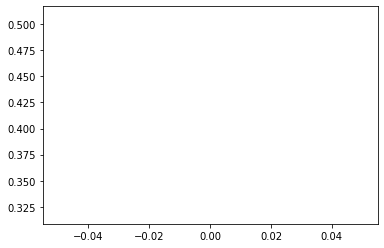

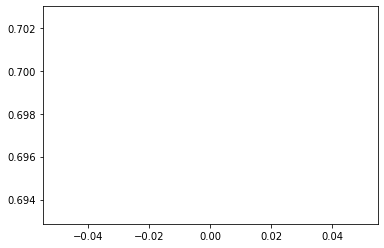

In [23]:
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=1,
    validation_data=(x_test, y_test)
)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

## 2 epocas

Epoch 1/2
10092/10092 [==============================] - 40s 4ms/step - loss: 0.6928 - accuracy: 0.5122 - val_loss: 0.6958 - val_accuracy: 0.3182
Epoch 2/2
10092/10092 [==============================] - 40s 4ms/step - loss: 0.6926 - accuracy: 0.5125 - val_loss: 0.6925 - val_accuracy: 0.5303


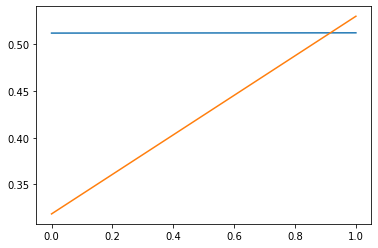

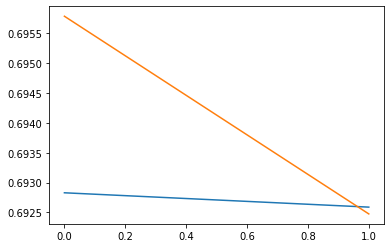

In [24]:
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=2,
    validation_data=(x_test, y_test)
)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

## 4 epocas

Epoch 1/4
10092/10092 [==============================] - 37s 4ms/step - loss: 0.6924 - accuracy: 0.5157 - val_loss: 0.6920 - val_accuracy: 0.5455
Epoch 2/4
10092/10092 [==============================] - 37s 4ms/step - loss: 0.6923 - accuracy: 0.5142 - val_loss: 0.6878 - val_accuracy: 0.3939
Epoch 3/4
10092/10092 [==============================] - 37s 4ms/step - loss: 0.6922 - accuracy: 0.5156 - val_loss: 0.6922 - val_accuracy: 0.4091
Epoch 4/4
10092/10092 [==============================] - 37s 4ms/step - loss: 0.6921 - accuracy: 0.5179 - val_loss: 0.6884 - val_accuracy: 0.3485


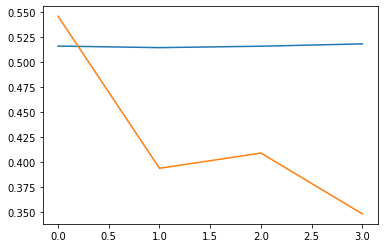

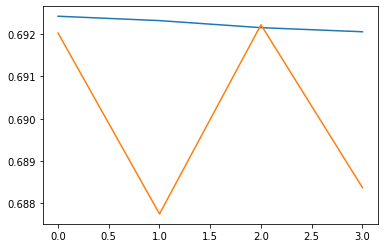

In [25]:
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=4,
    validation_data=(x_test, y_test)
)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

## 8 epocas

Epoch 1/8
10092/10092 [==============================] - 37s 4ms/step - loss: 0.6920 - accuracy: 0.5172 - val_loss: 0.6877 - val_accuracy: 0.5000
Epoch 2/8
10092/10092 [==============================] - 37s 4ms/step - loss: 0.6918 - accuracy: 0.5189 - val_loss: 0.6893 - val_accuracy: 0.6364
Epoch 3/8
10092/10092 [==============================] - 37s 4ms/step - loss: 0.6919 - accuracy: 0.5198 - val_loss: 0.6925 - val_accuracy: 0.3485
Epoch 4/8
10092/10092 [==============================] - 38s 4ms/step - loss: 0.6918 - accuracy: 0.5204 - val_loss: 0.6888 - val_accuracy: 0.5000
Epoch 5/8
10092/10092 [==============================] - 37s 4ms/step - loss: 0.6916 - accuracy: 0.5200 - val_loss: 0.6906 - val_accuracy: 0.3636
Epoch 6/8
10092/10092 [==============================] - 38s 4ms/step - loss: 0.6915 - accuracy: 0.5195 - val_loss: 0.6865 - val_accuracy: 0.4848
Epoch 7/8
10092/10092 [==============================] - 37s 4ms/step - loss: 0.6914 - accuracy: 0.5207 - val_loss: 0.6835 -

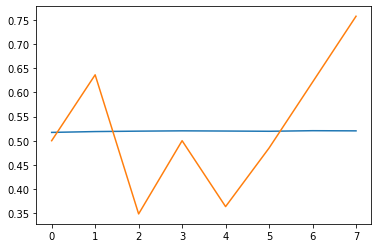

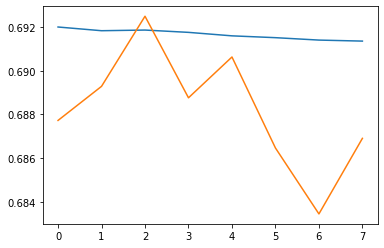

In [26]:
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=8,
    validation_data=(x_test, y_test)
)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

## 16 epocas

Epoch 1/16
10092/10092 [==============================] - 41s 4ms/step - loss: 0.6933 - accuracy: 0.5073 - val_loss: 0.6973 - val_accuracy: 0.3182
Epoch 2/16
10092/10092 [==============================] - 42s 4ms/step - loss: 0.6927 - accuracy: 0.5112 - val_loss: 0.7140 - val_accuracy: 0.3182
Epoch 3/16
10092/10092 [==============================] - 42s 4ms/step - loss: 0.6925 - accuracy: 0.5146 - val_loss: 0.7075 - val_accuracy: 0.3182
Epoch 4/16
10092/10092 [==============================] - 39s 4ms/step - loss: 0.6924 - accuracy: 0.5148 - val_loss: 0.6861 - val_accuracy: 0.5606
Epoch 5/16
10092/10092 [==============================] - 39s 4ms/step - loss: 0.6922 - accuracy: 0.5157 - val_loss: 0.6878 - val_accuracy: 0.4394
Epoch 6/16
10092/10092 [==============================] - 41s 4ms/step - loss: 0.6922 - accuracy: 0.5160 - val_loss: 0.6873 - val_accuracy: 0.6818
Epoch 7/16
10092/10092 [==============================] - 42s 4ms/step - loss: 0.6922 - accuracy: 0.5162 - val_loss: 0

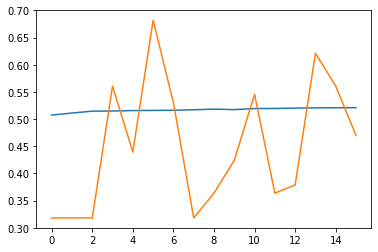

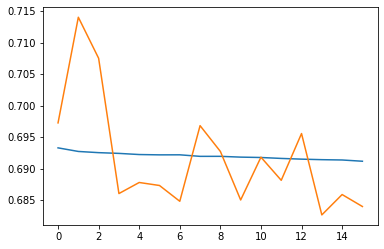

In [6]:
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=16,
    validation_data=(x_test, y_test)
)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

## 32 epocas

Epoch 1/32
10092/10092 [==============================] - 39s 4ms/step - loss: 0.6901 - accuracy: 0.5240 - val_loss: 0.6886 - val_accuracy: 0.5909
Epoch 2/32
10092/10092 [==============================] - 44s 4ms/step - loss: 0.6900 - accuracy: 0.5256 - val_loss: 0.6883 - val_accuracy: 0.6212
Epoch 3/32
10092/10092 [==============================] - 39s 4ms/step - loss: 0.6899 - accuracy: 0.5243 - val_loss: 0.6946 - val_accuracy: 0.3030
Epoch 4/32
10092/10092 [==============================] - 37s 4ms/step - loss: 0.6899 - accuracy: 0.5259 - val_loss: 0.6929 - val_accuracy: 0.3788
Epoch 5/32
10092/10092 [==============================] - 37s 4ms/step - loss: 0.6898 - accuracy: 0.5262 - val_loss: 0.6832 - val_accuracy: 0.5000
Epoch 6/32
10092/10092 [==============================] - 37s 4ms/step - loss: 0.6897 - accuracy: 0.5264 - val_loss: 0.6899 - val_accuracy: 0.4091
Epoch 7/32
10092/10092 [==============================] - 37s 4ms/step - loss: 0.6894 - accuracy: 0.5263 - val_loss: 0

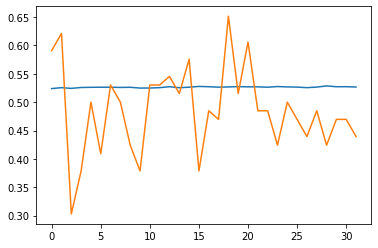

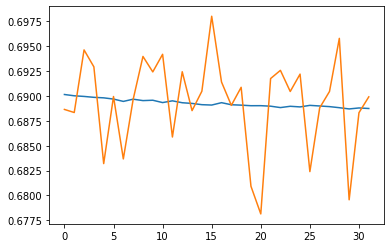

In [28]:
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=32,
    validation_data=(x_test, y_test)
)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

Sin OHLC

## 16 epocas

Epoch 1/16
10092/10092 [==============================] - 45s 4ms/step - loss: 0.6933 - accuracy: 0.5089 - val_loss: 0.6973 - val_accuracy: 0.3182
Epoch 2/16
10092/10092 [==============================] - 47s 5ms/step - loss: 0.6928 - accuracy: 0.5108 - val_loss: 0.7034 - val_accuracy: 0.3182
Epoch 3/16
10092/10092 [==============================] - 46s 5ms/step - loss: 0.6926 - accuracy: 0.5126 - val_loss: 0.6933 - val_accuracy: 0.5606
Epoch 4/16
10092/10092 [==============================] - 46s 5ms/step - loss: 0.6925 - accuracy: 0.5138 - val_loss: 0.6911 - val_accuracy: 0.4242
Epoch 5/16
10092/10092 [==============================] - 47s 5ms/step - loss: 0.6923 - accuracy: 0.5128 - val_loss: 0.6998 - val_accuracy: 0.3182
Epoch 6/16
10092/10092 [==============================] - 46s 5ms/step - loss: 0.6922 - accuracy: 0.5153 - val_loss: 0.6936 - val_accuracy: 0.3182
Epoch 7/16
10092/10092 [==============================] - 45s 4ms/step - loss: 0.6922 - accuracy: 0.5157 - val_loss: 0

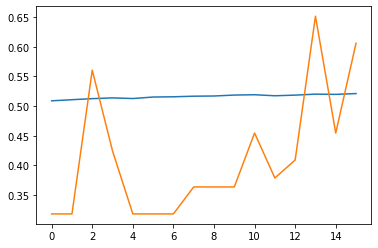

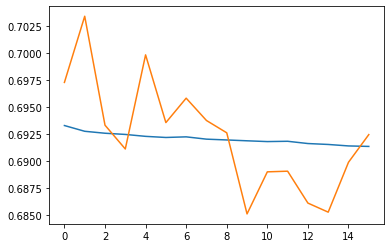

In [26]:
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=16,
    validation_data=(x_test, y_test)
)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

## 32 epocas

Epoch 1/32
10092/10092 [==============================] - 45s 4ms/step - loss: 0.6912 - accuracy: 0.5208 - val_loss: 0.6905 - val_accuracy: 0.3636
Epoch 2/32
10092/10092 [==============================] - 45s 4ms/step - loss: 0.6911 - accuracy: 0.5218 - val_loss: 0.6887 - val_accuracy: 0.4242
Epoch 3/32
10092/10092 [==============================] - 45s 4ms/step - loss: 0.6910 - accuracy: 0.5217 - val_loss: 0.6802 - val_accuracy: 0.4545
Epoch 4/32
10092/10092 [==============================] - 46s 5ms/step - loss: 0.6909 - accuracy: 0.5230 - val_loss: 0.6926 - val_accuracy: 0.3788
Epoch 5/32
10092/10092 [==============================] - 45s 4ms/step - loss: 0.6907 - accuracy: 0.5237 - val_loss: 0.6846 - val_accuracy: 0.6515
Epoch 6/32
10092/10092 [==============================] - 45s 4ms/step - loss: 0.6906 - accuracy: 0.5245 - val_loss: 0.6871 - val_accuracy: 0.4091
Epoch 7/32
10092/10092 [==============================] - 45s 4ms/step - loss: 0.6905 - accuracy: 0.5238 - val_loss: 0

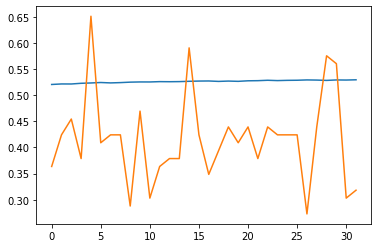

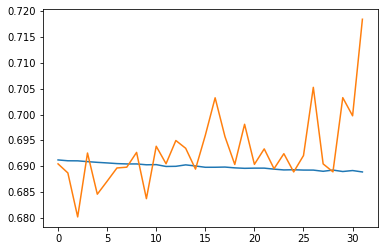

In [27]:
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=32,
    validation_data=(x_test, y_test)
)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [32]:
full_df = pd.read_csv('./data/processed/full_df.csv')

In [33]:
train, test = train_test_split(full_df, train_size=0.8, random_state=42)
del full_df

In [34]:
train.drop(columns=['open','high','low','close'], inplace=True)
test.drop(columns=['open','high','low','close'], inplace=True)
train.head(4)

percentage_price_change  hour  day  day_of_week  week  month  quarter  \
268375                -0.108317     8    7            0    45     11        4   
240343                -0.028838    18   11            4    19      5        2   
306918                -0.057523     6   19            4     3      1        1   
80949                 -0.053049     1   28            3    17      4        2   

        year  discrete_rsi  discrete_ema12_ema26  discrete_ema_12  \
268375  2011            -1                    -1               -1   
240343  2007             0                     1                1   
306918  2018             0                     1                1   
80949   2016             0                     1               -1   

        discrete_ema_26  discrete_bollinger_bands  discrete_macd_signal  \
268375               -1                         0                     0   
240343                1                         0                     1   
306918                1                         0                     1   
80949                -1                         0                     1   

        discrete_macd_hist  discrete_macd_hist_signal  \
268375                   0                          1   
240343                   0                          0   
306918                   0                          0   
80949                    0                          0   

        percentage_price_change_shifted_1  percentage_price_change_shifted_2  \
268375                          -0.026290                          -0.195537   
240343                           0.033655                          -0.033644   
306918                          -0.067544                          -0.031606   
80949                           -0.143908                          -0.003531   

        percentage_price_change_shifted_3  percentage_price_change_shifted_4  \
268375                           0.033121                          -0.050593   
240343                           0.002403                           0.021634   
306918                           0.181347                          -0.005757   
80949                            0.018543                           0.020313   

        percentage_price_change_shifted_5  discrete_rsi_shifted_1  \
268375                          -0.082381                    -1.0   
240343                          -0.024032                     0.0   
306918                           0.016553                     0.0   
80949                            0.087511                     0.0   

        discrete_rsi_shifted_2  discrete_rsi_shifted_3  \
268375                    -1.0                    -1.0   
240343                     0.0                     0.0   
306918                     0.0                     0.0   
80949                      0.0                     0.0   

        discrete_rsi_shifted_4  discrete_rsi_shifted_5  \
268375                    -1.0                    -1.0   
240343                     0.0                     0.0   
306918                     0.0                     0.0   
80949                      0.0                     0.0   

        discrete_ema12_ema26_Shifted_1  discrete_ema12_ema26_Shifted_2  \
268375                            -1.0                            -1.0   
240343                             1.0                             1.0   
306918                             1.0                             1.0   
80949                              1.0                             1.0   

        discrete_ema12_ema26_Shifted_3  discrete_ema12_ema26_Shifted_4  \
268375                            -1.0                            -1.0   
240343                             1.0                             1.0   
306918                             1.0                             1.0   
80949                              1.0                             1.0   

        discrete_ema12_ema26_Shifted_5  discrete_ema_12_shifted_1  \
268375                            -1.0               

In [35]:
len(train.columns)

60

In [36]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train = train.drop(columns='target')
y_train = train['target']

scaled_features = scaler.fit_transform(x_train)
x_train = pd.DataFrame(scaled_features, index=x_train.index, columns=x_train.columns)

x_test = test.drop(columns='target')
y_test = test['target']

scaled_features = scaler.fit_transform(x_test)
x_test = pd.DataFrame(scaled_features, index=x_test.index, columns=x_test.columns)

## 100 epocas

Epoch 1/100
8075/8075 [==============================] - 36s 4ms/step - loss: 0.6889 - accuracy: 0.5302 - val_loss: 0.7032 - val_accuracy: 0.3182
Epoch 2/100
8075/8075 [==============================] - 36s 4ms/step - loss: 0.6886 - accuracy: 0.5320 - val_loss: 0.7086 - val_accuracy: 0.3485
Epoch 3/100
8075/8075 [==============================] - 36s 4ms/step - loss: 0.6887 - accuracy: 0.5314 - val_loss: 0.6974 - val_accuracy: 0.3788
Epoch 4/100
8075/8075 [==============================] - 36s 4ms/step - loss: 0.6884 - accuracy: 0.5320 - val_loss: 0.7162 - val_accuracy: 0.3030
Epoch 5/100
8075/8075 [==============================] - 35s 4ms/step - loss: 0.6887 - accuracy: 0.5312 - val_loss: 0.7150 - val_accuracy: 0.3182
Epoch 6/100
8075/8075 [==============================] - 36s 4ms/step - loss: 0.6886 - accuracy: 0.5311 - val_loss: 0.7048 - val_accuracy: 0.3182
Epoch 7/100
8075/8075 [==============================] - 37s 5ms/step - loss: 0.6885 - accuracy: 0.5318 - val_loss: 0.7015 -

Epoch 57/100
8075/8075 [==============================] - 34s 4ms/step - loss: 0.6872 - accuracy: 0.5320 - val_loss: 0.6891 - val_accuracy: 0.3939
Epoch 58/100
8075/8075 [==============================] - 38s 5ms/step - loss: 0.6873 - accuracy: 0.5331 - val_loss: 0.6906 - val_accuracy: 0.4242
Epoch 59/100
8075/8075 [==============================] - 37s 5ms/step - loss: 0.6870 - accuracy: 0.5334 - val_loss: 0.7019 - val_accuracy: 0.5455
Epoch 60/100
8075/8075 [==============================] - 37s 5ms/step - loss: 0.6871 - accuracy: 0.5335 - val_loss: 0.6812 - val_accuracy: 0.6667
Epoch 61/100
8075/8075 [==============================] - 37s 5ms/step - loss: 0.6868 - accuracy: 0.5333 - val_loss: 0.6914 - val_accuracy: 0.4091
Epoch 62/100
8075/8075 [==============================] - 37s 5ms/step - loss: 0.6867 - accuracy: 0.5342 - val_loss: 0.7043 - val_accuracy: 0.3485
Epoch 63/100
8075/8075 [==============================] - 37s 5ms/step - loss: 0.6871 - accuracy: 0.5324 - val_loss: 0

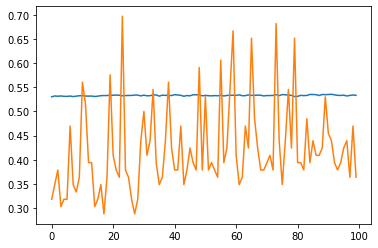

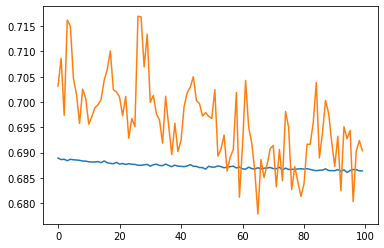

In [37]:
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=100,
    validation_data=(x_test, y_test)
)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [38]:
model.save('./models/model_100_ephocs.h5')

In [33]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train = full_df.drop(columns='target')
y_train = full_df['target']

In [36]:
len(x_train)

322997

In [35]:
y_train

0         1.0
1         1.0
2         1.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         1.0
9         1.0
10        0.0
11        0.0
12        0.0
13        0.0
14        0.0
15        0.0
16        0.0
17        0.0
18        0.0
19        0.0
20        0.0
21        0.0
22        0.0
23        1.0
24        0.0
25        0.0
26        0.0
27        1.0
28        1.0
29        1.0
         ... 
322967    0.0
322968    0.0
322969    0.0
322970    1.0
322971    1.0
322972    1.0
322973    1.0
322974    1.0
322975    1.0
322976    1.0
322977    1.0
322978    1.0
322979    0.0
322980    1.0
322981    1.0
322982    1.0
322983    1.0
322984    1.0
322985    0.0
322986    0.0
322987    0.0
322988    1.0
322989    0.0
322990    1.0
322991    0.0
322992    0.0
322993    0.0
322994    0.0
322995    0.0
322996    1.0
Name: target, Length: 322997, dtype: float64

Epoch 1/16
10094/10094 [==============================] - 40s 4ms/step - loss: 5.0090 - accuracy: 0.5046
Epoch 2/16
10094/10094 [==============================] - 44s 4ms/step - loss: 0.6956 - accuracy: 0.5043
Epoch 3/16
10094/10094 [==============================] - 40s 4ms/step - loss: 0.6947 - accuracy: 0.5047
Epoch 4/16
10094/10094 [==============================] - 45s 4ms/step - loss: 0.6950 - accuracy: 0.5046
Epoch 5/16
10094/10094 [==============================] - 41s 4ms/step - loss: 0.6940 - accuracy: 0.5047
Epoch 6/16
10094/10094 [==============================] - 40s 4ms/step - loss: 0.6956 - accuracy: 0.5051
Epoch 7/16
10094/10094 [==============================] - 43s 4ms/step - loss: 0.6937 - accuracy: 0.5048
Epoch 8/16
10094/10094 [==============================] - 45s 4ms/step - loss: 0.6940 - accuracy: 0.5049
Epoch 9/16
10094/10094 [==============================] - 46s 5ms/step - loss: 0.6938 - accuracy: 0.5049
Epoch 10/16
10094/10094 [==============================

KeyError: 'val_accuracy'

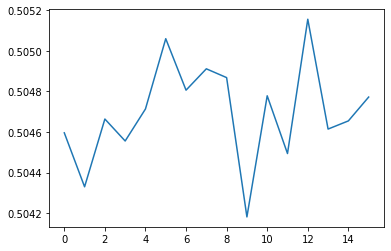

In [37]:
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=16,
)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [39]:
model.save('./model_16_ephocs.h5')

In [49]:
df = pd.DataFrame(data={'a': [1,2,3,4,5,6]})

In [51]:
x = 'asd'
df['b'] = 1 if x == 'asd' else 0
df

a  b
0  1  1
1  2  1
2  3  1
3  4  1
4  5  1
5  6  1

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(df)
df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
df

a    b
0  0.0  0.0
1  0.2  0.0
2  0.4  0.0
3  0.6  0.0
4  0.8  0.0
5  1.0  0.0